In [1]:
# Bibliotecas utilizadas
import sys
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import json
import requests
import json
import time

# Brasil

In [4]:
dfBrChart = pd.read_csv('regional-br-weekly-latest.csv', skiprows = 1)
dfBrChart.head(30)

,Position,Track Name,Artist,Streams,URL
0,1,Todo Mundo Vai Sofrer - Ao Vivo,Marília Mendonça,3669068,https://open.spotify.com/track/4E6RdcCWMiHTu7z...
1,2,Tijolão - Ao Vivo,Jorge & Mateus,3579092,https://open.spotify.com/track/6QwFUcPc5nhsqZu...
2,3,Lençol Dobrado,João Gustavo e Murilo,3472416,https://open.spotify.com/track/5pRGXCDY0eT6R1Q...
3,4,quando a bad bater - ao vivo,Luan Santana,3289651,https://open.spotify.com/track/1nVIlX3h3Ds9bH6...
4,5,Uma nora pra cada dia,MC Kevinho,2839233,https://open.spotify.com/track/2bbFhnxYjeb9jYE...
5,6,Sentou e Gostou,MC JottaPê,2822673,https://open.spotify.com/track/6V43u5SCjkfMpxM...
6,7,Vou Ter Que Superar - Ao Vivo,Matheus & Kauan,2817093,https://open.spotify.com/track/6sRLrSetyIwIKhW...
7,8,Hit Contagiante,Felipe Original,2781844,https://open.spotify.com/track/5dKesZwp6deuhEe...
8,9,Milu,Gusttavo Lima,2651004,https://open.spotify.com/track/1nqaSoiLuqevDes...
9,10,Quando a vontade bater (Participação especial ...,Pk,2614976,https://open.spotify.com/track/26WpOBpHiIMoBuM...


In [ ]:
dfBrChart.Artist.

In [6]:
client_id = '6dacd0a4a11745d5868651781f390eb9'
client_secret = '2e00679bdcfc48c8a0ad8cc6ac1a3b1f'
client = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client)

In [50]:
listaFeature = []
for row in dfBrChart.iterrows():
    url = row[1]['URL']
    feature = sp.audio_features(url)[0]
    feature['Position'] = row[1]['Position']
    feature['Track Name'] = row[1]['Track Name']
    feature['Artist'] = row[1]['Artist']
    feature['Streams'] = row[1]['Streams']
    listaFeature.append(feature)

In [59]:
dfbr = pd.DataFrame(listaFeature)

In [61]:
dfbr.columns

Index(['Artist', 'Position', 'Streams', 'Track Name', 'acousticness',
       'analysis_url', 'danceability', 'duration_ms', 'energy', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri',
       'valence'],
      dtype='object')

In [62]:
dfbr.describe()

,Position,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.047841e+06,0.364877,0.684325,193630.685000,0.702870,0.004290,5.195000,0.366230,-5.329185,0.645000,0.124023,127.611725,4.000000,0.632066
std,57.879185,6.326624e+05,0.239608,0.132113,64907.602125,0.167022,0.033543,3.591863,0.310864,2.431084,0.479714,0.113873,26.389192,0.200502,0.204114
min,1.000000,5.077720e+05,0.007900,0.293000,113000.000000,0.142000,0.000000,0.000000,0.026400,-14.794000,0.000000,0.026100,71.105000,3.000000,0.079200
25%,50.750000,6.033258e+05,0.156750,0.600500,161089.000000,0.584500,0.000000,2.000000,0.106000,-6.363500,0.000000,0.046325,104.996750,4.000000,0.521750
50%,100.500000,8.366755e+05,0.330500,0.689500,179683.000000,0.728500,0.000000,5.000000,0.216000,-4.873000,1.000000,0.074350,127.912000,4.000000,0.667500
75%,150.250000,1.188490e+06,0.538250,0.785250,202334.750000,0.835000,0.000000,8.000000,0.634250,-3.613250,1.000000,0.149500,149.847250,4.000000,0.772000
max,200.000000,3.669068e+06,0.945000,0.947000,577819.000000,0.984000,0.330000,11.000000,0.990000,0.302000,1.000000,0.546000,190.097000,5.000000,0.969000


In [5]:
dfbr.head()

NameError: name 'dfbr' is not defined

# França

In [63]:
dfFrChart = pd.read_csv('regional-fr-weekly-latest.csv', skiprows = 1)
dfFrChart.head()

,Position,Track Name,Artist,Streams,URL
0,1,Ma belle,Moha La Squale,2035548,https://open.spotify.com/track/3Aq1SJ1hWlfazx8...
1,2,Elle est bonne sa mère,Vegedream,1752859,https://open.spotify.com/track/7j56bK7gq6iV7zs...
2,3,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,1732950,https://open.spotify.com/track/6osaMSJh9NguagE...
3,4,Señorita,Shawn Mendes,1538448,https://open.spotify.com/track/6v3KW9xbzN5yKLt...
4,5,Médicament,Niska,1289092,https://open.spotify.com/track/55mCsKCo4bPuYtZ...


In [64]:
listaFeature = []
for row in dfFrChart.iterrows():
    url = row[1]['URL']
    feature = sp.audio_features(url)[0]
    feature['Position'] = row[1]['Position']
    feature['Track Name'] = row[1]['Track Name']
    feature['Artist'] = row[1]['Artist']
    feature['Streams'] = row[1]['Streams']
    listaFeature.append(feature)

In [65]:
dffr = pd.DataFrame(listaFeature)

In [67]:
dffr.describe()

,Position,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,200.000000,2.000000e+02,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,4.526234e+05,0.308008,0.74458,201038.565000,0.644280,0.003586,5.17500,0.150784,-6.618200,0.375000,0.150523,122.431295,3.990000,0.532330
std,57.879185,2.881258e+05,0.208733,0.11737,36014.702148,0.130523,0.026011,3.54219,0.102061,1.952261,0.485338,0.119045,25.324483,0.200251,0.209112
min,1.000000,2.300300e+05,0.008850,0.37000,113000.000000,0.317000,0.000000,0.00000,0.041200,-11.875000,0.000000,0.029000,66.570000,3.000000,0.101000
25%,50.750000,2.735588e+05,0.141750,0.67600,178905.250000,0.560750,0.000000,1.75000,0.091850,-7.887750,0.000000,0.057500,101.976250,4.000000,0.380250
50%,100.500000,3.467700e+05,0.276500,0.75000,195580.000000,0.653000,0.000000,5.00000,0.115000,-6.375500,0.000000,0.101500,123.956500,4.000000,0.533500
75%,150.250000,5.141132e+05,0.432750,0.82700,217369.750000,0.743250,0.000005,8.00000,0.173250,-5.395000,1.000000,0.231000,136.300500,4.000000,0.683000
max,200.000000,2.035548e+06,0.821000,0.96700,354320.000000,0.929000,0.330000,11.00000,0.764000,-2.097000,1.000000,0.569000,192.128000,5.000000,0.961000


# Japão

In [68]:
dfJpChart = pd.read_csv('regional-jp-weekly-latest.csv', skiprows = 1)
dfJpChart.head()

,Position,Track Name,Artist,Streams,URL
0,1,Pretender,Official HIGE DANdism,818760,https://open.spotify.com/track/5LkWXxDxUTwEVHL...
1,2,宿命,Official HIGE DANdism,570240,https://open.spotify.com/track/3SjtQBle9ChDYCj...
2,3,マリーゴールド,Aimyon,514088,https://open.spotify.com/track/2cKiHG16JBiqHdi...
3,4,ノーダウト,Official HIGE DANdism,455194,https://open.spotify.com/track/5DMEvbg3gUmiR5H...
4,5,Machigaisagashi,Masaki Suda,434787,https://open.spotify.com/track/4Jj31lihp5Nvdi4...


In [70]:
listaFeature = []
for row in dfJpChart.iterrows():
    url = row[1]['URL']
    feature = sp.audio_features(url)[0]
    feature['Position'] = row[1]['Position']
    feature['Track Name'] = row[1]['Track Name']
    feature['Artist'] = row[1]['Artist']
    feature['Streams'] = row[1]['Streams']
    listaFeature.append(feature)

In [71]:
dfjp = pd.DataFrame(listaFeature)

In [72]:
dfjp.describe()

,Position,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,137558.240000,0.173427,0.583845,249289.375000,0.749345,0.007494,4.795000,0.180936,-4.461500,0.800000,0.059843,123.345540,3.980000,0.577120
std,57.879185,96522.250787,0.197208,0.119582,45876.771881,0.158830,0.058659,3.426614,0.117533,1.800216,0.401004,0.058301,30.501368,0.244744,0.196909
min,1.000000,70455.000000,0.000088,0.294000,156347.000000,0.270000,0.000000,0.000000,0.040900,-11.265000,0.000000,0.023200,71.409000,1.000000,0.105000
25%,50.750000,81304.000000,0.021725,0.510000,213851.250000,0.651000,0.000000,2.000000,0.097475,-5.471250,1.000000,0.031375,98.753500,4.000000,0.423750
50%,100.500000,104375.500000,0.084850,0.579500,244080.000000,0.790500,0.000000,5.000000,0.134500,-4.176500,1.000000,0.042250,122.465500,4.000000,0.596500
75%,150.250000,144343.000000,0.289250,0.654250,281626.750000,0.870500,0.000000,8.000000,0.249750,-3.188750,1.000000,0.062725,141.250000,4.000000,0.732250
max,200.000000,818760.000000,0.795000,0.868000,369320.000000,0.988000,0.708000,11.000000,0.771000,-1.386000,1.000000,0.461000,202.937000,5.000000,0.962000


In [73]:
dfbr.to_csv('feature_spotify_charts_br.csv')
dffr.to_csv('feature_spotify_charts_fr.csv')
dfjp.to_csv('feature_spotify_charts_jp.csv')

In [7]:
df = pd.read_csv('feature_spotify_charts_br.csv')

In [10]:
#pd.set_option('columns',60)
df.head()

,Unnamed: 0,Artist,Position,Streams,Track Name,acousticness,analysis_url,danceability,duration_ms,energy,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,Marília Mendonça,1,3669068,Todo Mundo Vai Sofrer - Ao Vivo,0.2810,https://api.spotify.com/v1/audio-analysis/4E6R...,0.621,154661,0.743,...,0.4110,-3.864,1,0.0738,111.454,4,https://api.spotify.com/v1/tracks/4E6RdcCWMiHT...,audio_features,spotify:track:4E6RdcCWMiHTu7zy1VTNDo,0.581
1,1,Jorge & Mateus,2,3579092,Tijolão - Ao Vivo,0.4690,https://api.spotify.com/v1/audio-analysis/6QwF...,0.637,175219,0.877,...,0.3430,-3.680,0,0.1980,118.889,4,https://api.spotify.com/v1/tracks/6QwFUcPc5nhs...,audio_features,spotify:track:6QwFUcPc5nhsqZuhXUYtV7,0.691
2,2,João Gustavo e Murilo,3,3472416,Lençol Dobrado,0.3610,https://api.spotify.com/v1/audio-analysis/5pRG...,0.707,179165,0.664,...,0.3310,-5.042,1,0.0382,124.991,4,https://api.spotify.com/v1/tracks/5pRGXCDY0eT6...,audio_features,spotify:track:5pRGXCDY0eT6R1QicAn7Uk,0.674
3,3,Luan Santana,4,3289651,quando a bad bater - ao vivo,0.3070,https://api.spotify.com/v1/audio-analysis/1nVI...,0.647,179722,0.787,...,0.5320,-4.767,1,0.0413,128.121,4,https://api.spotify.com/v1/tracks/1nVIlX3h3Ds9...,audio_features,spotify:track:1nVIlX3h3Ds9bH6JMQopIU,0.535
4,4,MC Kevinho,5,2839233,Uma nora pra cada dia,0.0394,https://api.spotify.com/v1/audio-analysis/2bbF...,0.888,131200,0.528,...,0.0964,-8.751,0,0.1920,150.181,4,https://api.spotify.com/v1/tracks/2bbFhnxYjeb9...,audio_features,spotify:track:2bbFhnxYjeb9jYEX2MDKLQ,0.924


In [11]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Position', 'Streams', 'Track Name',
       'acousticness', 'analysis_url', 'danceability', 'duration_ms', 'energy',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri',
       'valence'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f329d000630>]],
      dtype=object)

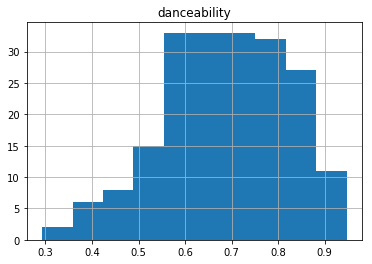

In [20]:
import seaborn as sns
df.hist('danceability')